In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [50]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115211 entries, 0 to 115210
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   lat          115211 non-null  float64
 1   lng          115211 non-null  float64
 2   desc         115211 non-null  object 
 3   zip          100789 non-null  float64
 4   title        115211 non-null  object 
 5   timeStamp    115211 non-null  object 
 6   twp          115177 non-null  object 
 7   addr         115211 non-null  object 
 8   e            115211 non-null  int64  
 9   Reason       115211 non-null  object 
 10  hour         115211 non-null  int64  
 11  month        115211 non-null  int64  
 12  day of week  115211 non-null  object 
 13  Year         115211 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 12.3+ MB


In [52]:
df.describe()

,lat,lng,zip,e,hour,month,Year
count,115211.000000,115211.000000,100789.000000,115211.0,115211.000000,115211.000000,115211.000000
mean,40.159127,-75.317145,19237.423201,1.0,13.064759,5.539714,2015.931291
std,0.093297,0.170770,336.415922,0.0,5.662017,3.115296,0.252959
min,30.333596,-95.595595,17752.000000,1.0,0.000000,1.000000,2015.000000
25%,40.100234,-75.391998,19038.000000,1.0,9.000000,3.000000,2016.000000
50%,40.144526,-75.304780,19401.000000,1.0,13.000000,5.000000,2016.000000
75%,40.229008,-75.211866,19446.000000,1.0,17.000000,8.000000,2016.000000
max,41.167156,-74.995041,77316.000000,1.0,23.000000,12.000000,2016.000000


In [53]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015


In [54]:
df.shape

(115211, 14)

In [55]:
df.drop(columns=['lat', 'lng', 'desc', 'zip','timeStamp','addr','e'], inplace=True)

In [56]:
df.isnull().sum()

title           0
twp            34
Reason          0
hour            0
month           0
day of week     0
Year            0
dtype: int64

In [57]:
df['twp'].mode()[0]

'LOWER MERION'

In [58]:
df['twp'] = df['twp'].fillna(df['twp'].mode()[0])

----------------------------------------------------------------------------------------------------
EMS        56986
Traffic    40830
Fire       17395
Name: Reason, dtype: int64


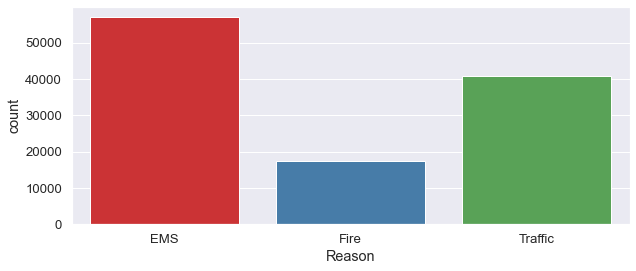

----------------------------------------------------------------------------------------------------
17    7509
16    7471
15    7175
14    6958
13    6954
12    6921
11    6491
18    6471
10    6260
9     6237
8     5901
19    5682
20    4989
7     4819
21    4314
22    3702
6     2983
23    2933
0     2402
1     2003
5     1951
2     1798
3     1664
4     1623
Name: hour, dtype: int64


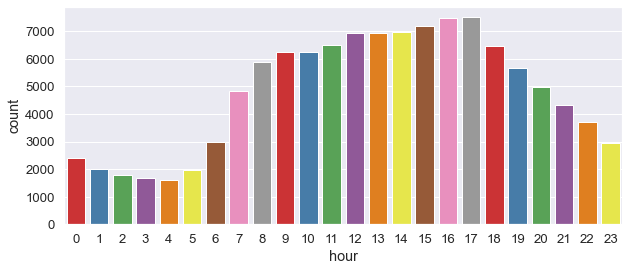

----------------------------------------------------------------------------------------------------
1     13096
7     12088
8     11904
6     11732
9     11669
2     11396
5     11374
4     11287
3     11059
12     7916
10     1690
Name: month, dtype: int64


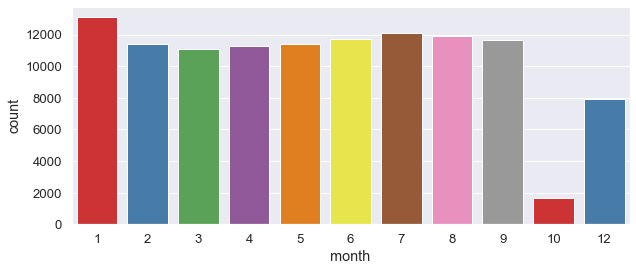

----------------------------------------------------------------------------------------------------
Fri    17391
Tue    17348
Wed    17323
Thu    16929
Mon    16919
Sat    15323
Sun    13978
Name: day of week, dtype: int64


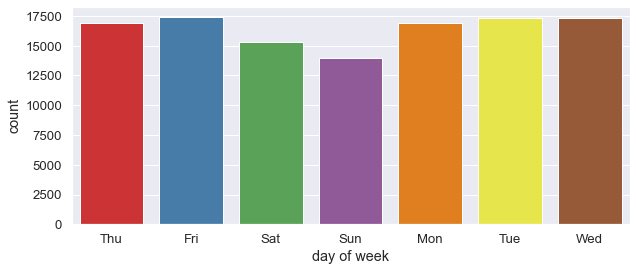

----------------------------------------------------------------------------------------------------
2016    107295
2015      7916
Name: Year, dtype: int64


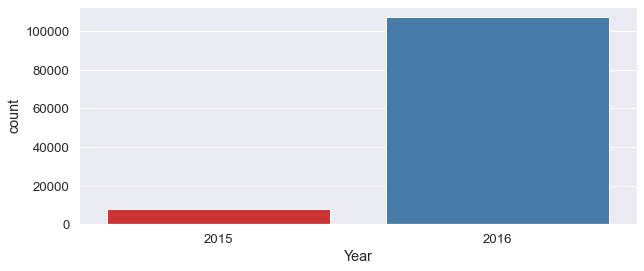

In [84]:
for col in df[['Reason', 'hour', 'month', 'day of week', 'Year']]:
    print('-'*100)
    print(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(df[col], palette='Set1')
    plt.show()

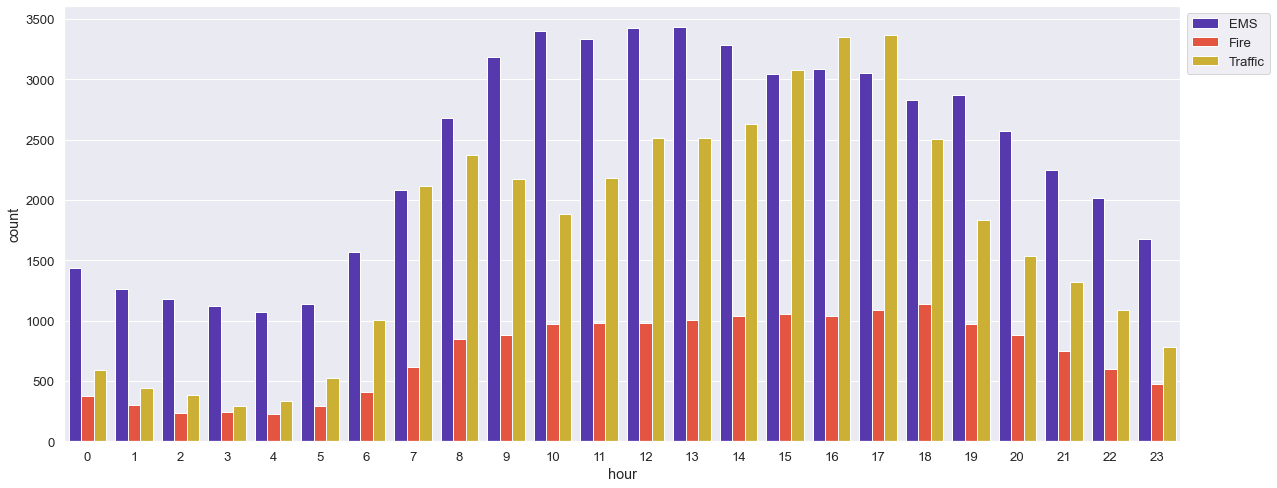

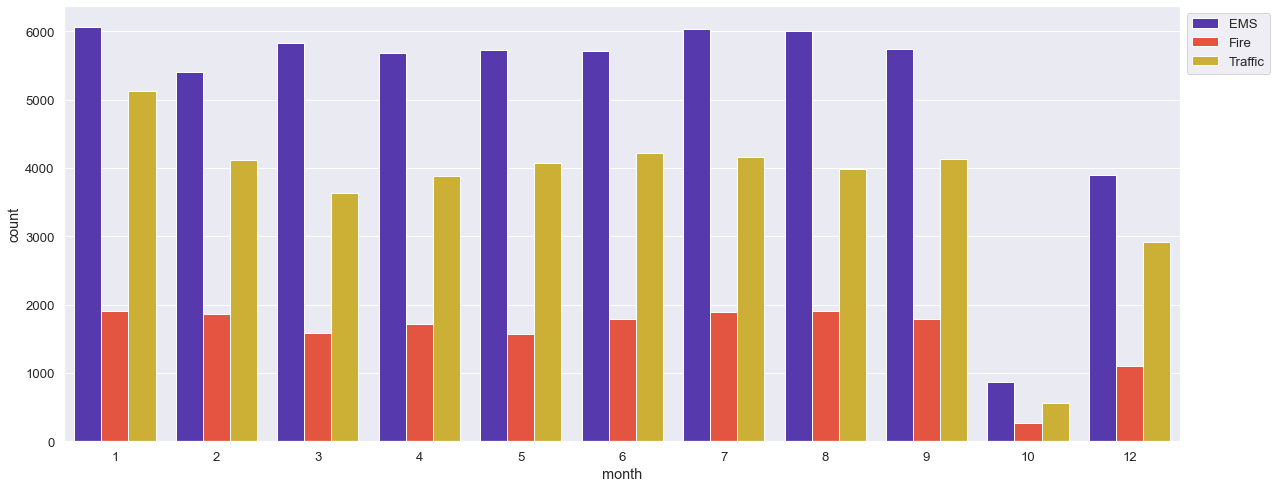

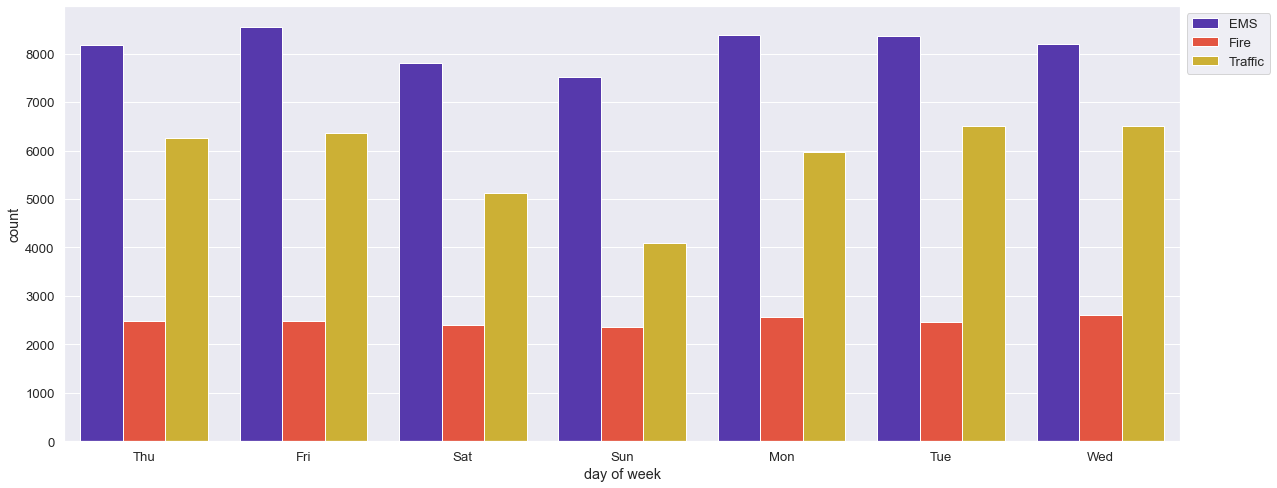

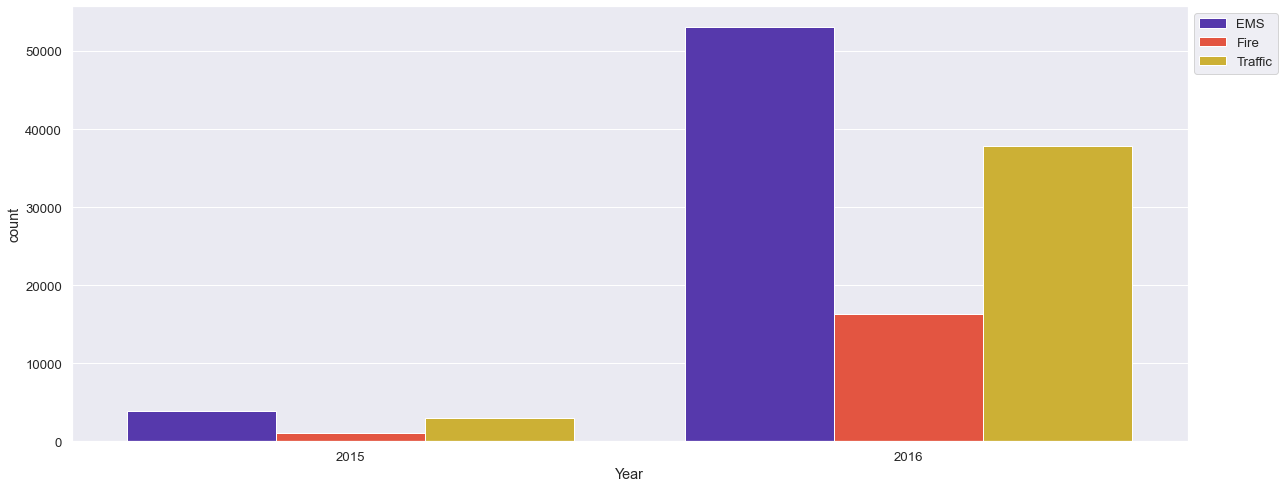

In [102]:
for col in df[['hour', 'month', 'day of week', 'Year']]:
    plt.figure(figsize=(20,8))
    sns.countplot(df[col], hue=df['Reason'], palette='CMRmap')
    plt.legend(bbox_to_anchor=(1,1), loc=2)
    plt.show()

In [103]:
top_ten = df['twp'].value_counts().head(10)
top_ten

LOWER MERION        9946
ABINGTON            6949
NORRISTOWN          6782
UPPER MERION        6021
CHELTENHAM          5334
POTTSTOWN           4857
UPPER MORELAND      3987
LOWER PROVIDENCE    3738
PLYMOUTH            3656
HORSHAM             3373
Name: twp, dtype: int64

In [104]:
top_ten = df[df['twp'].isin(top_ten.index)]
top_ten

,title,twp,Reason,hour,month,day of week,Year
2,Fire: GAS-ODOR/LEAK,NORRISTOWN,Fire,14,12,Thu,2015
3,EMS: CARDIAC EMERGENCY,NORRISTOWN,EMS,16,12,Thu,2015
6,EMS: NAUSEA/VOMITING,HORSHAM,EMS,16,12,Thu,2015
9,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,Traffic,17,12,Thu,2015
11,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,Traffic,16,12,Thu,2015
...,...,...,...,...,...,...,...
115202,Traffic: VEHICLE ACCIDENT -,LOWER MERION,Traffic,16,10,Wed,2016
115204,EMS: ABDOMINAL PAINS,HORSHAM,EMS,16,10,Wed,2016
115205,Fire: VEHICLE FIRE,HORSHAM,Fire,16,10,Wed,2016
115208,Traffic: VEHICLE FIRE -,HORSHAM,Traffic,16,10,Wed,2016


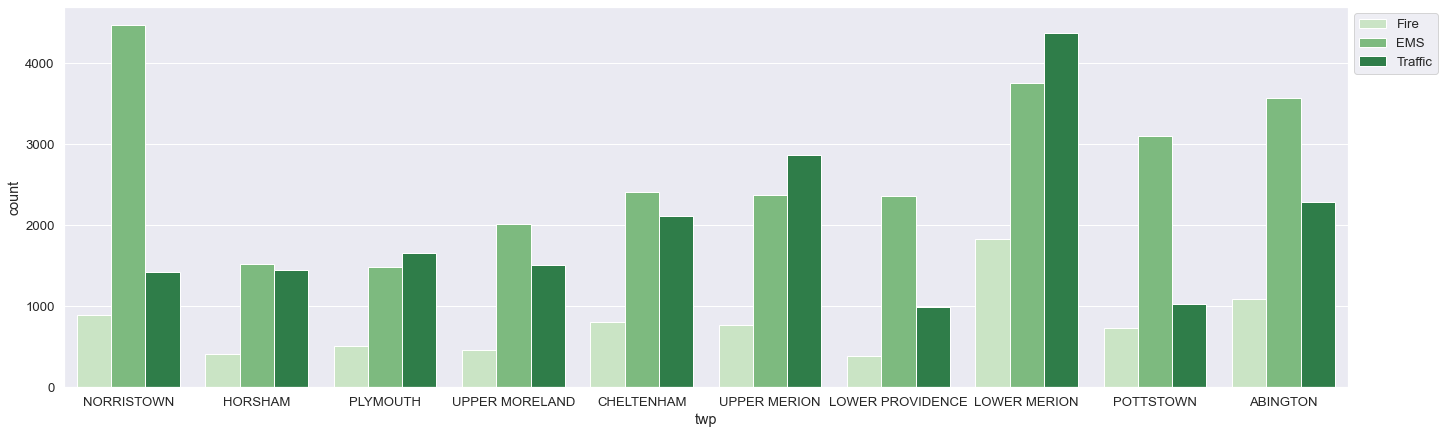

In [119]:
plt.figure(figsize=(23,7))
sns.countplot(top_ten['twp'], hue=top_ten['Reason'], palette='Greens')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

In [120]:
df.head()

,title,twp,Reason,hour,month,day of week,Year
0,EMS: BACK PAINS/INJURY,NEW HANOVER,EMS,17,12,Thu,2015
1,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,EMS,17,12,Thu,2015
2,Fire: GAS-ODOR/LEAK,NORRISTOWN,Fire,14,12,Thu,2015
3,EMS: CARDIAC EMERGENCY,NORRISTOWN,EMS,16,12,Thu,2015
4,EMS: DIZZINESS,LOWER POTTSGROVE,EMS,16,12,Thu,2015
